# Assignment_18_Forecasting (Airline)

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd       # For mathematical calculations 
import numpy as np
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [2]:
data = pd.read_excel("D:\Data Science\Assignments DS\LMS Assignments DS\Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# EDA

In [3]:
data.shape    # Rows and columns

(96, 2)

In [4]:
data.columns     # columns

Index(['Month', 'Passengers'], dtype='object')

In [5]:
data.index     # Rows

RangeIndex(start=0, stop=96, step=1)

In [6]:
data.info()    # Data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
data.describe()   # Discripttive statistics 

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
data.isna().sum()   # Checking null values, there is no null values present in given dataset

Month         0
Passengers    0
dtype: int64

In [9]:
print(data['Month'].unique())
print(data['Passengers'].unique())

['1995-01-01T00:00:00.000000000' '1995-02-01T00:00:00.000000000'
 '1995-03-01T00:00:00.000000000' '1995-04-01T00:00:00.000000000'
 '1995-05-01T00:00:00.000000000' '1995-06-01T00:00:00.000000000'
 '1995-07-01T00:00:00.000000000' '1995-08-01T00:00:00.000000000'
 '1995-09-01T00:00:00.000000000' '1995-10-01T00:00:00.000000000'
 '1995-11-01T00:00:00.000000000' '1995-12-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1996-02-01T00:00:00.000000000'
 '1996-03-01T00:00:00.000000000' '1996-04-01T00:00:00.000000000'
 '1996-05-01T00:00:00.000000000' '1996-06-01T00:00:00.000000000'
 '1996-07-01T00:00:00.000000000' '1996-08-01T00:00:00.000000000'
 '1996-09-01T00:00:00.000000000' '1996-10-01T00:00:00.000000000'
 '1996-11-01T00:00:00.000000000' '1996-12-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '1997-02-01T00:00:00.000000000'
 '1997-03-01T00:00:00.000000000' '1997-04-01T00:00:00.000000000'
 '1997-05-01T00:00:00.000000000' '1997-06-01T00:00:00.000000000'
 '1997-07-01T00:00:00.000

In [10]:
# print(data['Month'].value_counts())
# print(data['Passengers'].value_counts())

In [11]:
data[data.duplicated()]   # In this dataset very few duplicate values, it may not effect major on prediction.

,Month,Passengers


In [12]:
data.drop_duplicates(inplace=True)
## removed the duplicated

In [13]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [14]:
data.corr()

,Passengers
Passengers,1.0


# Visualization

In [15]:
# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

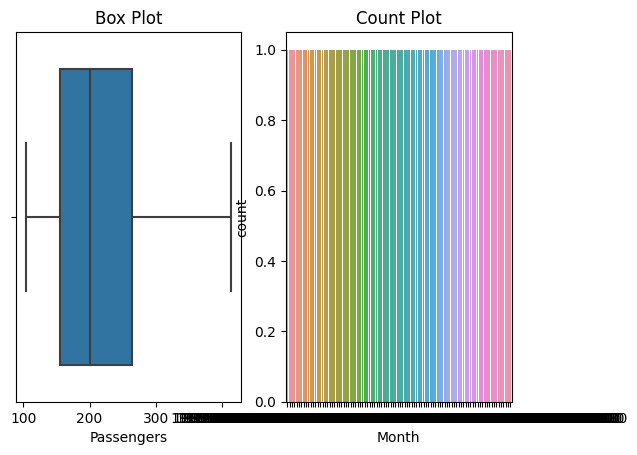

In [16]:
plt.subplot(1,2,1)
sns.boxplot(x = 'Passengers', data = data);plt.title("Box Plot")
plt.subplot(1,2,2)
sns.countplot( x = 'Month', data = data);plt.title("Count Plot")
plt.show()

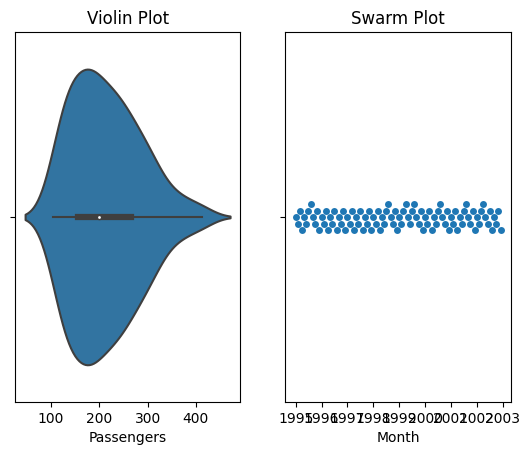

In [17]:
plt.subplot(1,2,1)
sns.violinplot(x = 'Passengers', data = data);plt.title("Violin Plot")
plt.subplot(1,2,2)
sns.swarmplot( x = 'Month', data = data);plt.title("Swarm Plot")
plt.show()

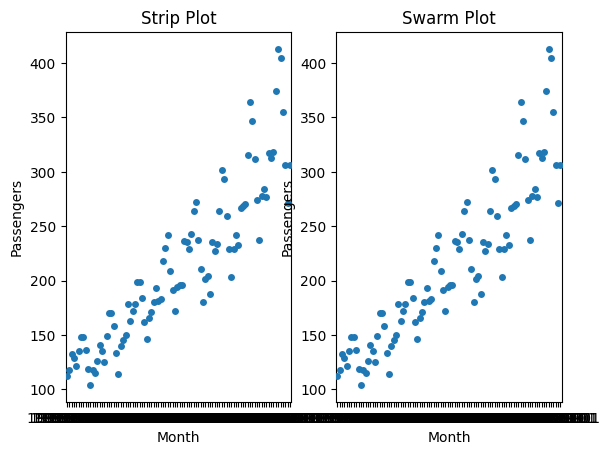

In [18]:
# Strip plot AND swarm plot will draw a scatterplot where one variable is categorical.
plt.subplot(1,2,1)
sns.stripplot(x = 'Month',y = 'Passengers', data = data);plt.title("Strip Plot")
plt.subplot(1,2,2)
sns.swarmplot( x = 'Month',y = 'Passengers', data = data);plt.title("Swarm Plot")
plt.show()

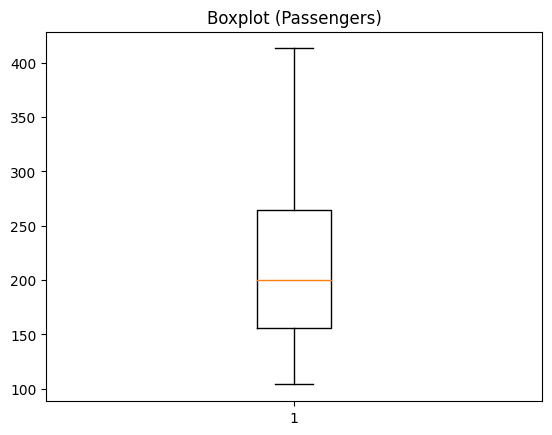

In [19]:
# Boxplot for outlier detection
plt.boxplot(data['Passengers']); plt.title("Boxplot (Passengers)")
plt.show()

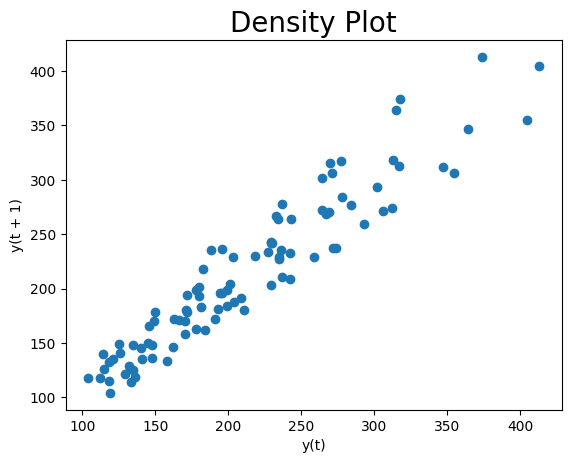

In [20]:
from pandas.plotting import lag_plot
lag_plot(data['Passengers'] ) # Lag plot show relationship betweeen two variables
plt.title("Density Plot", size = 20, y= 1)
plt.show()

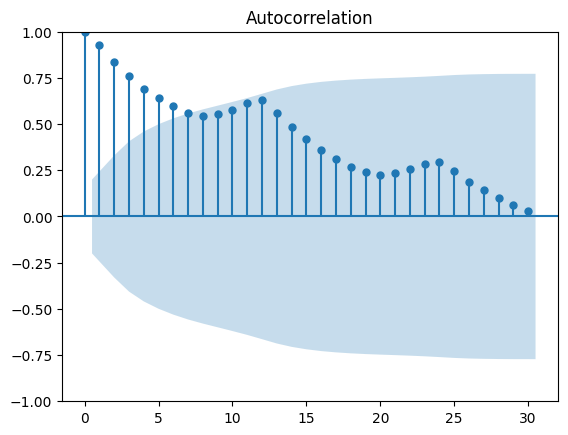

In [21]:
#Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Passengers'],lags=30)
plt.show()

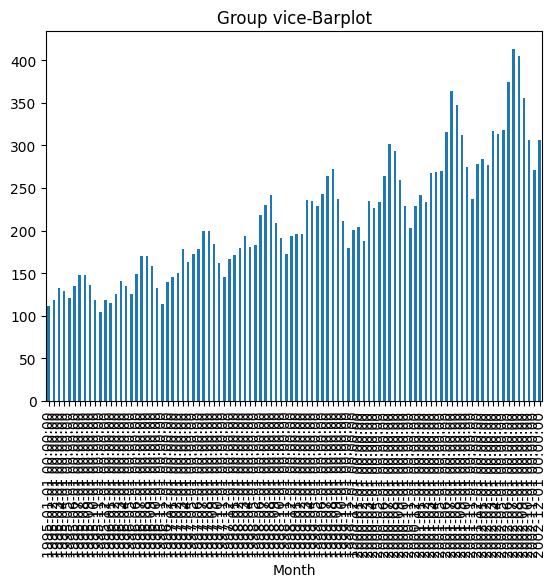

In [22]:
data.groupby('Month')['Passengers'].mean().plot.bar(); plt.title("Group vice-Barplot")
plt.show()

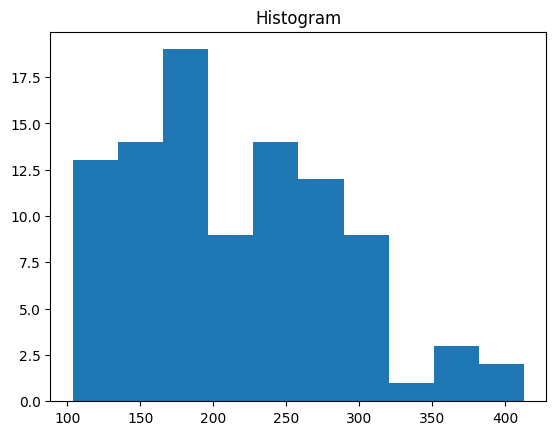

In [23]:
plt.hist( x = 'Passengers', data = data);plt.title("Histogram")  # Histogram represents skewness and distribution of data
plt.show()

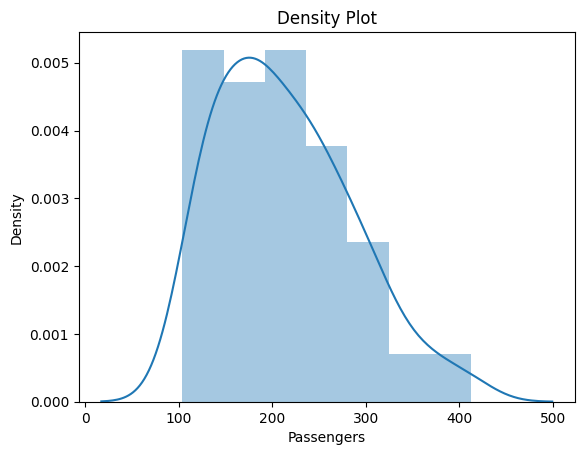

In [24]:
sns.distplot(x = data.Passengers);plt.xlabel('Passengers');plt.title("Density Plot")  # Shows the Distribution of data
plt.show()  # oR data.plot(kind="kde")

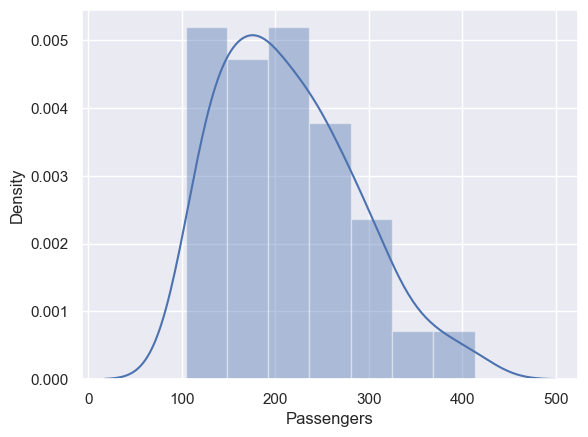

In [25]:
sns.set_theme()
rk= sns.distplot(data['Passengers'],kde=True)

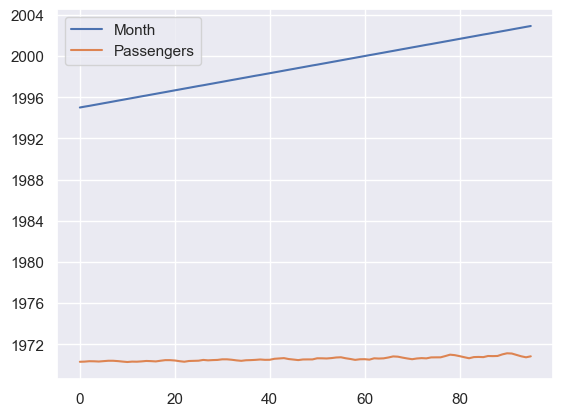

In [26]:
data.plot()
plt.show()

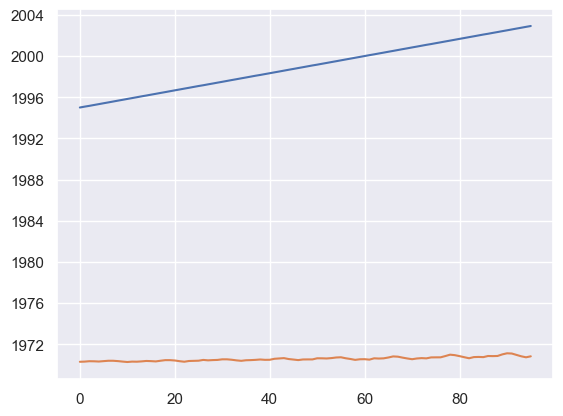

In [27]:
plt.plot(data)

# ACF plots and PACF plots

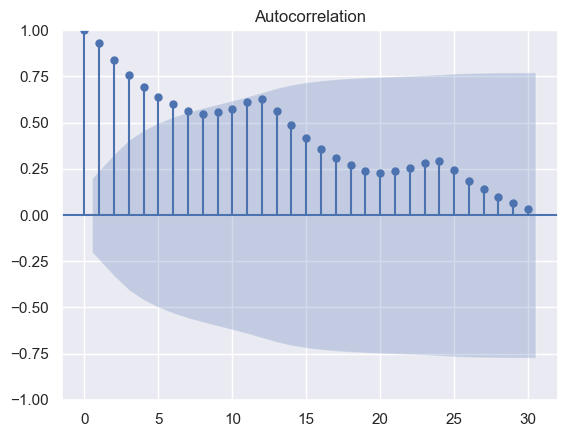

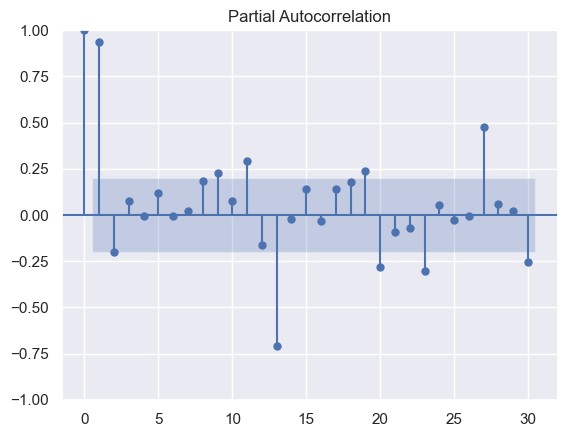

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=30)
tsa_plots.plot_pacf(data.Passengers,lags=30)
plt.show()

# Forecasting

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.metrics import mean_squared_error

In [30]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# Making the Date as DateTime index for the Dataframe¶

In [31]:
data.set_index('Month', inplace = True)
data.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [32]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# UpSampling

In [33]:
upsampled = data.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       135.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       170.0
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30       178.0
1997-07-31       199.0
1997-08-31       199.0


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


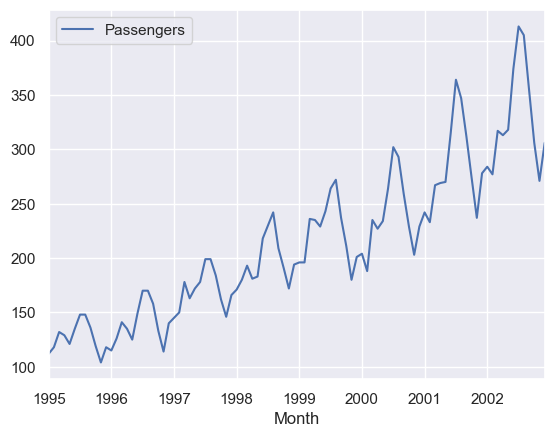

In [34]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [35]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-08-31,405.0
2002-09-30,355.0
2002-10-31,306.0


# Tranformations

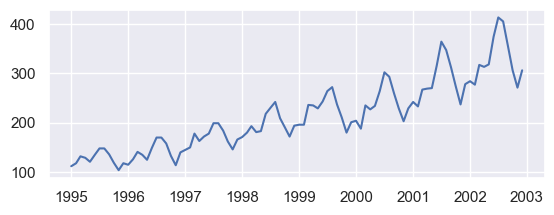

In [36]:
# line plot
plt.subplot(211)
plt.plot(data)

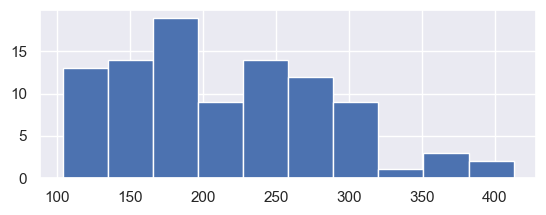

In [37]:
# histogram
plt.subplot(212)
plt.hist(data)
plt.show()

# Square Root Transform

In [38]:
dataframe = pd.DataFrame(data.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

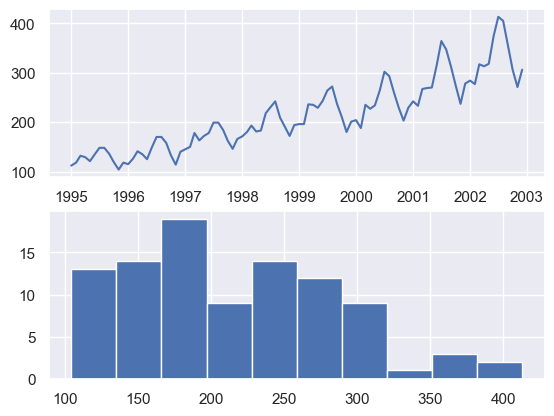

In [39]:
# line plot
plt.subplot(211)
plt.plot(data['Passengers'])
# histogram
plt.subplot(212)
plt.hist(data['Passengers'])
plt.show()

# Log Transform

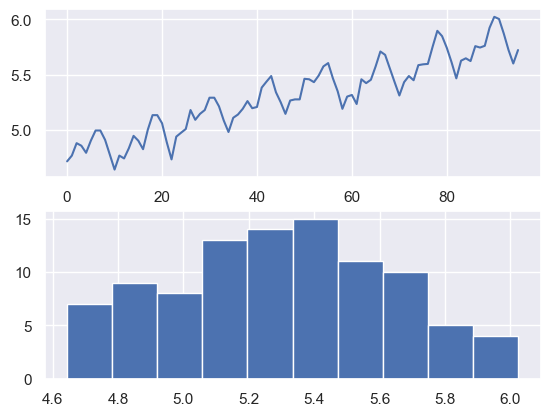

In [40]:
from numpy import log     ## importing the log library
dataframe = pd.DataFrame(data.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [41]:
Train = interpolated.head(81)
Test = interpolated.tail(14)
print(Train)
Test

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
...                ...
2001-05-31       270.0
2001-06-30       315.0
2001-07-31       364.0
2001-08-31       347.0
2001-09-30       312.0

[81 rows x 1 columns]


,Passengers
Month,
2001-11-30,237.0
2001-12-31,278.0
2002-01-31,284.0
2002-02-28,277.0
2002-03-31,317.0
2002-04-30,313.0
2002-05-31,318.0
2002-06-30,374.0
2002-07-31,413.0


# Moving Average

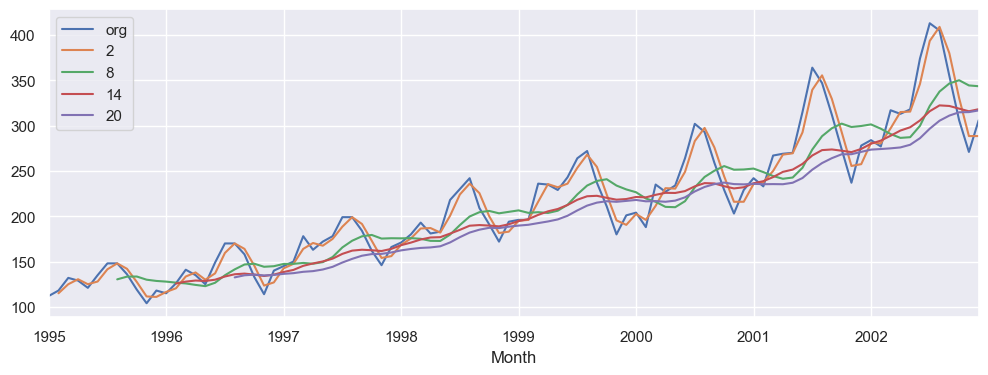

In [42]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

In [43]:
len(Test)

14

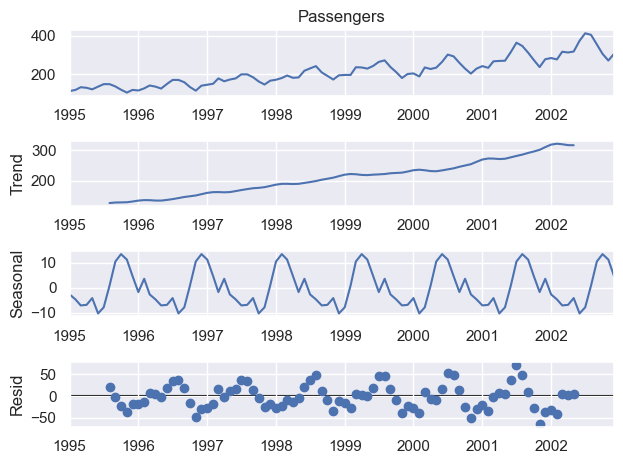

In [44]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=14)  # freq = 14 we can use period instead of freq 
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

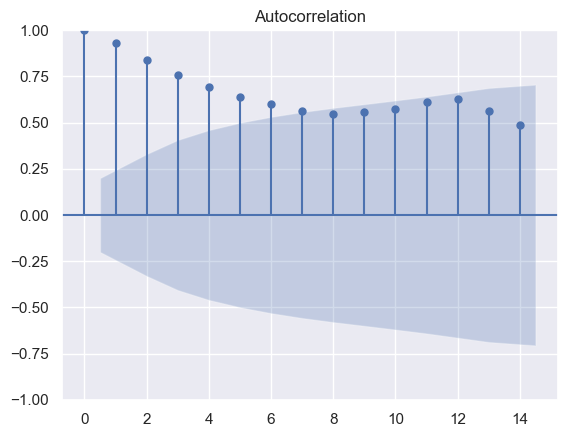

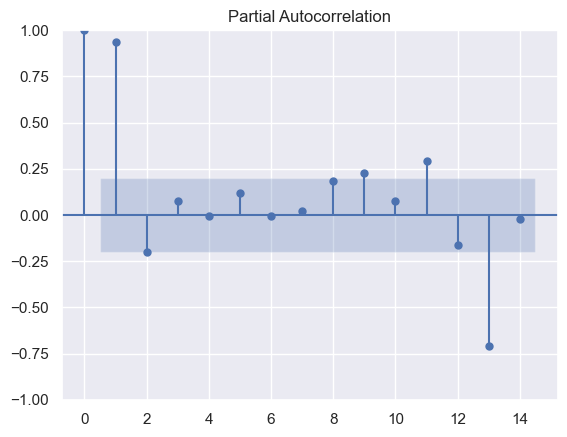

In [45]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(data.Passengers,lags=14)
tsa_plots.plot_pacf(data.Passengers,lags=14)
plt.show()

# Evaluation Metric MAPE

In [46]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [47]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.894852596201867

# Holt method

In [48]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

15.911732844642485

# Holts winter exponential smoothing with additive seasonality and additive trend

In [49]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

3.5048104545232412

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [50]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.4005341356325838

In [51]:
rmse_hwe_mul_add = np.sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

10.235219228649234

# Final Model by combining train and test

In [52]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [53]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

2003-01-31    313.478967
2003-02-28    318.530032
2003-03-31    320.728270
2003-04-30    320.896176
2003-05-31    321.940294
2003-06-30    321.098732
2003-07-31    316.590461
2003-08-31    318.631108
2003-09-30    318.621787
2003-10-31    327.512226
Freq: M, dtype: float64

In [54]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-08-31,405.0
2002-09-30,355.0
2002-10-31,306.0


In [55]:
interpolated.reset_index(inplace=True)

In [56]:
interpolated['t'] = 1

In [57]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1
94,2002-11-30,271.0,1


In [58]:
for i,row in interpolated.iterrows():
    interpolated['t'].iloc[i] = i+1

In [59]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94
94,2002-11-30,271.0,95


In [60]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values

In [61]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836
94,2002-11-30,271.0,95,9025


In [62]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction

In [63]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002
94,2002-11-30,271.0,95,9025,Nov,2002


In [64]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable

In [66]:
Airlines = pd.concat([interpolated,months],axis=1)
Airlines.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,2002-11-30,271.0,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


<AxesSubplot: xlabel='month', ylabel='year'>

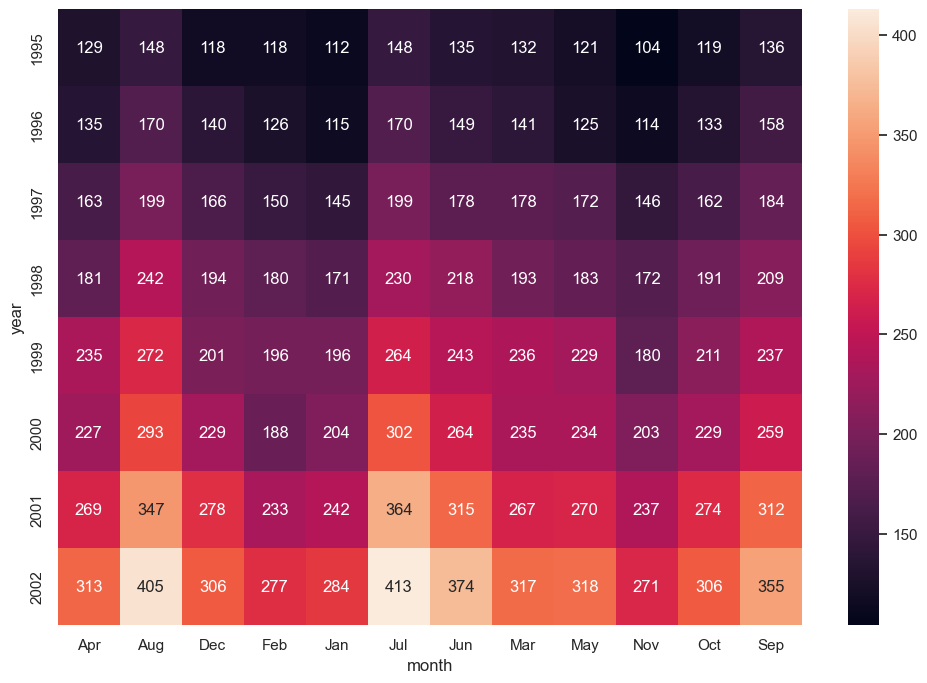

In [68]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot: xlabel='year', ylabel='Passengers'>

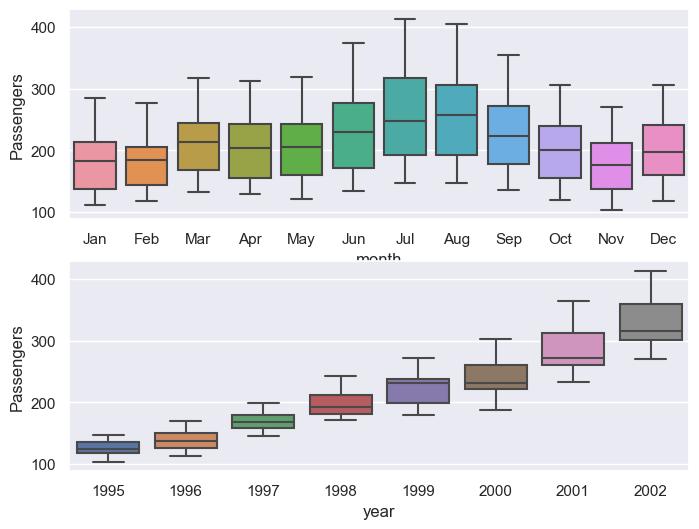

In [69]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<AxesSubplot: xlabel='year', ylabel='Passengers'>

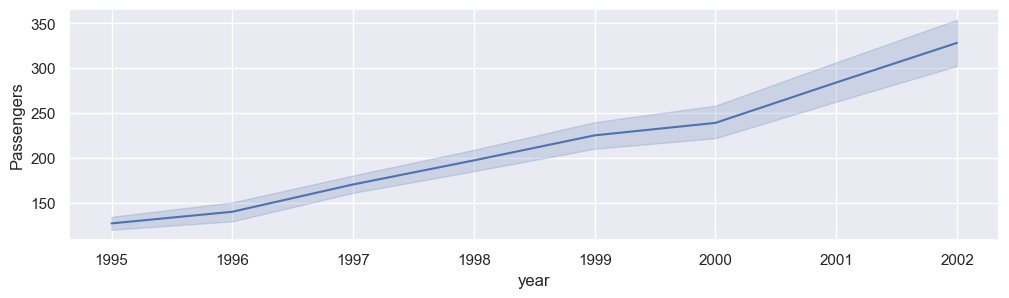

In [70]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

# Splitting data

In [71]:
Train = Airlines.head(81) # training data
Test = Airlines.tail(14) # test Data

In [72]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.48379883520373

In [73]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.29168664671047

In [74]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.23045842456938

In [75]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.73813565673314

In [76]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.0868610780056

In [77]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.188551058474

In [78]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.914858786222235

In [79]:
#Comparing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])`

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.914859
4,rmse_add_sea_quad,24.086861
2,rmse_Quad,46.230458
1,rmse_Exp,46.291687
0,rmse_linear,49.483799
3,rmse_add_sea,130.738136
5,rmse_Mult_sea,137.188551


# rmse_multi_add_sea will be prefered than any other in this analysis

# The least RMSE values has the rmse_multi_add_sea  model and we can final this model